In [1]:
# import các thư viện cần thiết
import zipfile
import numpy as np
import random
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# Đọc dữ liệu từ tệp ZIP và lưu vào DataFrame.
df = pd.read_csv('C:/Users/ACER/Downloads/data.zip')

In [3]:
# Tạo một danh sách (list) để chứa dữ liệu từ DataFrame.
data_list = []
# Duyệt qua từng hàng của DataFrame df.
for index, row in df.iterrows():
    # Chuyển đổi hàng thành danh sách và thêm vào danh sách data_list.
    data_list.append(row.tolist())

In [4]:
# In ra độ dài của danh sách data_list.
print(len(data_list))

372450


In [5]:
# In ra kích thước của phần tử thứ 100,000 trong danh sách data_list.
print(np.shape(data_list[100000]))

(785,)


[11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 85, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 255, 213, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 189, 255, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 177, 255, 57, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 177, 255, 111, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142, 255, 111, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 255, 177, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 255, 229, 

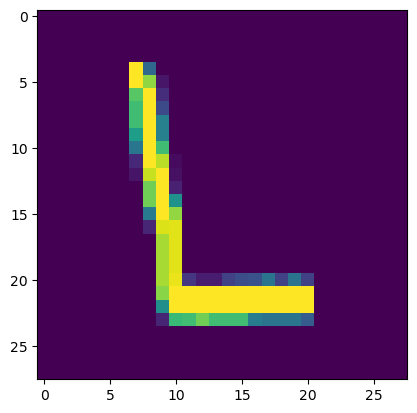

In [6]:
# Lấy dữ liệu tại hàng thứ 100,000 từ danh sách data_list và lưu vào biến letter.
letter = data_list[100000]

# Chuyển đổi chuỗi các số thành mảng NumPy, loại bỏ ký tự đầu (label), và định hình thành mảng 2D (28x28).
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28, 28)

# In ra dữ liệu và hiển thị hình ảnh của biểu đồ số học.
print(letter)
plt.imshow(x)

In [7]:
# Tạo danh sách data chứa dữ liệu từ data_list (bỏ đi ký tự đầu tiên).
data = [row[1:] for row in data_list]

# Tạo danh sách label chứa nhãn từ data_list (chỉ lấy ký tự đầu tiên).
label = [row[0] for row in data_list]

In [8]:
# In ra số lượng nhãn trong tập dữ liệu.
print(len(label))

372450


In [9]:
# Sử dụng hàm train_test_split để chia tập dữ liệu thành tập huấn luyện và tập kiểm tra.
# - data: Dữ liệu (features) cần chia
# - label: Nhãn (labels) tương ứng với dữ liệu
# - train_size=0.8: Chia dữ liệu sao cho 80% dữ liệu dành cho tập huấn luyện
# - shuffle=True: Xáo trộn dữ liệu trước khi chia
X_train, X_test, y_train, y_test = train_test_split(data, label, train_size=0.8, shuffle=True)

In [10]:
# Chuyển đổi kích thước dữ liệu ảnh thành 4D (số mẫu, chiều cao, chiều rộng, số kênh).
X_train = np.array(X_train)
X_test = np.array(X_test)
train_images_reshape = X_train.reshape(-1, 28, 28, 1)
val_images_reshape = X_test.reshape(-1, 28, 28, 1)

In [11]:
# Chuyển đổi nhãn thành one-hot encoding.
train_labels_onehot = tf.keras.utils.to_categorical(y_train)
val_labels_onehot = tf.keras.utils.to_categorical(y_test)

In [12]:
# Xây dựng mô hình CNN.
model = Sequential()

In [13]:
# Định nghĩa kiến trúc mạng CNN

# Tầng tích chập 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Lớp tích chập đầu tiên với 32 bộ lọc 3x3 và kích hoạt ReLU, đầu vào có kích thước 28x28x1.
# Sau đó, lớp tối ưu hóa MaxPooling với cửa sổ 2x2 giúp giảm kích thước đầu ra.

# Tầng tích chập 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Lớp tích chập thứ hai với 64 bộ lọc 3x3 và kích hoạt ReLU.
# Lớp tối ưu hóa MaxPooling tiếp tục được sử dụng.

# Tầng tích chập 3
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Lớp tích chập thứ ba với 128 bộ lọc 3x3 và kích hoạt ReLU.
# Lớp tối ưu hóa MaxPooling tiếp tục được sử dụng.

In [14]:
# Dàn phẳng (flatten) dữ liệu trước khi đưa vào fully connected layers
model.add(Flatten())

# Tầng fully connected 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
# Lớp fully connected đầu tiên với 256 đơn vị và kích hoạt ReLU.
# Lớp Dropout với tỷ lệ 0.25 giúp ngăn chặn overfitting bằng cách tắt ngẫu nhiên một số đơn vị trong quá trình huấn luyện.

# Tầng fully connected 2
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
# Lớp fully connected thứ hai với 128 đơn vị và kích hoạt ReLU.
# Lớp Dropout thứ hai với tỷ lệ 0.25 để ngăn chặn overfitting.

# Tầng đầu ra với softmax
model.add(Dense(26, activation='softmax'))
# Lớp fully connected cuối cùng với 26 đơn vị (tương ứng với số lớp dữ liệu) và kích hoạt softmax để đưa ra xác suất phân loại.


In [ ]:
# Compile và huấn luyện mô hình
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_images_reshape, train_labels_onehot, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
2328/2328 [==============================] - 194s 82ms/step - loss: 0.3376 - accuracy: 0.9101
Epoch 2/10
2328/2328 [==============================] - 164s 71ms/step - loss: 0.1169 - accuracy: 0.9680
Epoch 3/10
2328/2328 [==============================] - 141s 60ms/step - loss: 0.0931 - accuracy: 0.9746
Epoch 4/10
2328/2328 [==============================] - 136s 58ms/step - loss: 0.0816 - accuracy: 0.9776
Epoch 5/10
2328/2328 [==============================] - 141s 60ms/step - loss: 0.0728 - accuracy: 0.9800
Epoch 6/10
2328/2328 [==============================] - 133s 57ms/step - loss: 0.0656 - accuracy: 0.9821
Epoch 7/10
2328/2328 [==============================] - 126s 54ms/step - loss: 0.0594 - accuracy: 0.9837
Epoch 8/10
2328/2328 [==============================] - 132s 57ms/step - loss: 0.0577 - accuracy: 0.9843
Epoch 9/10
2328/2328 [==============================] - 128s 55ms/step - loss: 0.0542 - accuracy: 0.9851
Epoch 10/10
1718/2328 [=====================>........] 

In [ ]:
# Đánh giá mô hình trên dữ liệu validation
val_pred_cnn = np.argmax(model.predict(val_images_reshape), axis=-1)

In [ ]:
# Hiển thị các kết quả
plt.figure(figsize=(10,8), dpi=200)
sns.set(font_scale = 0.5)
ax = sns.heatmap(confusion_matrix(y_test, val_pred_cnn), annot=True, fmt='d', )
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.set_ylabel("True Label", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
plt.show()
print("Accuracy (CNN):", accuracy_score(y_test, val_pred_cnn))
print("Precision (CNN):", precision_score(y_test, val_pred_cnn, average='macro'))
print("Recall (CNN):", recall_score(y_test, val_pred_cnn, average='macro'))
print(classification_report(y_test, val_pred_cnn))